<img src="./logo_UNSAM.jpg" align="right" width="300" />  -->
#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1 - Síntesis de Señales

#### Sofía Gervasi

## Introducción

El presente trabajo tiene como objetivo principal la síntesis y representación gráfica de un conjunto de señales. Posteriormente, se llevará a cabo el análisis de la ortogonalidad entre la señal sinusoidal de referencia y el resto de la señales propuestas. Del mismo modo, se estudiará la autocorrelación de la señal original y la correlación cruzada con las demás. 

## Análisis y Desarrollo

### 1. Sintetizar y graficar las siguientes señales:

i. Una señal sinusoidal de 2KHz.

ii. Misma señal amplificada y desfazada en π/2.

iii. Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

iv. Señal anterior recortada al 75% de su amplitud.

v. Una señal cuadrada de 4KHz.

vi. Un pulso rectangular de 10ms.


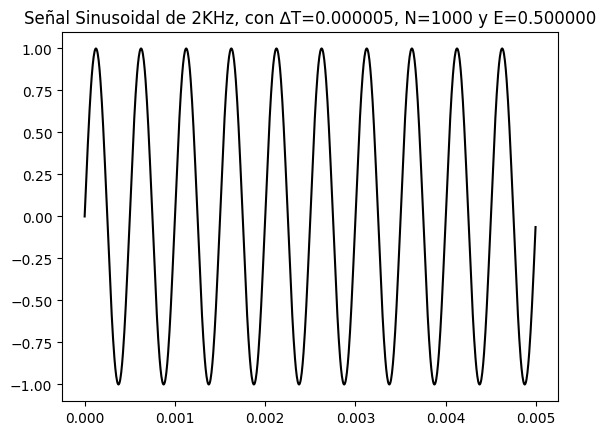

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 16 18:57:37 2025

@author: Sofía
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal#Defino variables
vmax= 1  #Volts 
dc = 0  #Volts
ff = 2000  #Hz
ph = 0 #Radianes
nn = 1000 # N
fs = 200000 #Hz
Ts=1/fs
E=vmax**2/2


#Defino la funcion
def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt= np.linspace(0,(nn-1)*Ts,nn).flatten()
    xx = vmax* np.sin(2 * np.pi * ff * tt + ph) + dc
    return xx, tt

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)


plt.figure()
plt.title('Señal Sinusoidal de 2KHz, con ∆T={:f}, N=1000 y E={:f}'.format(Ts,E))
plt.plot(tt, xx, color='black')

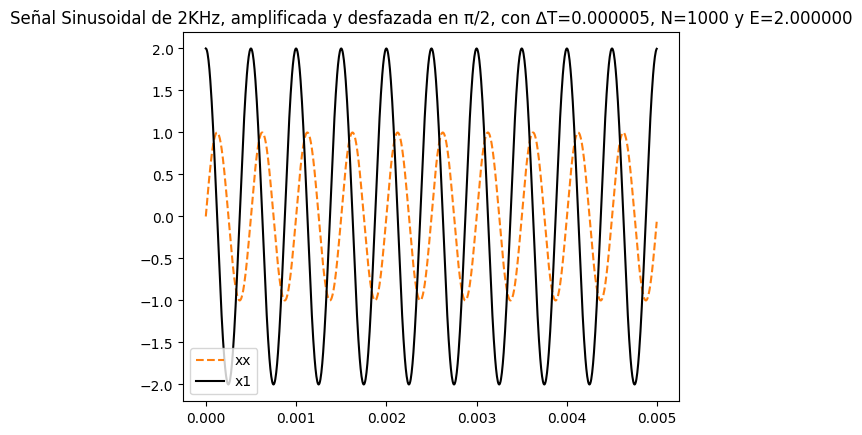

In [16]:
vmax= 2
ph=np.pi/2
Ts=1/fs
E=vmax**2/2

x1, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

plt.figure()
plt.title('Señal Sinusoidal de 2KHz, amplificada y desfazada en π/2, con ∆T={:f}, N=1000 y E={:f}'.format(Ts,E))
plt.plot(tt, xx, color='tab:orange',linestyle='--',label='xx')
plt.plot(tt, x1, color='black',label='x1')
plt.legend()

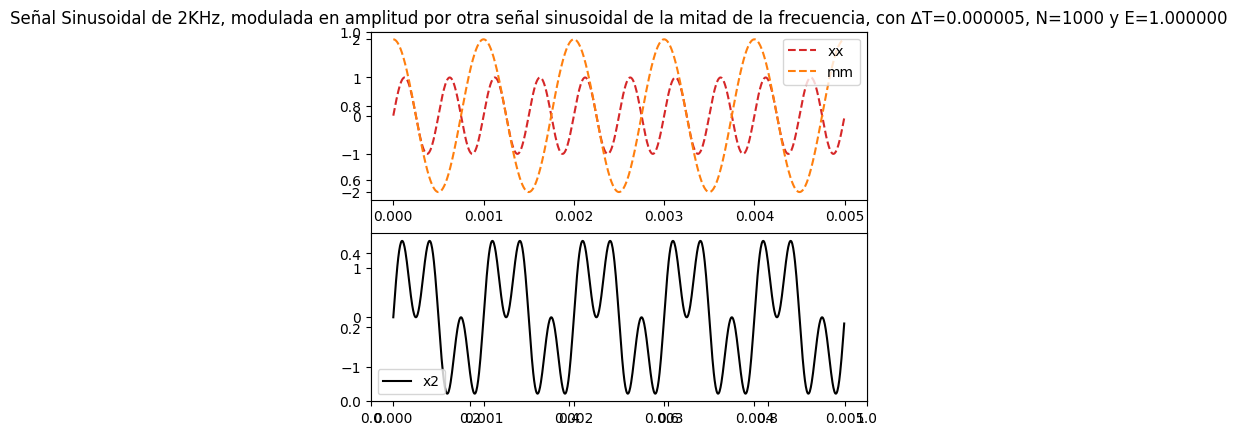

In [17]:
fm=1000 #Frecuencia de la señal moduladora
mm=2*np.sin(2 * np.pi * fm * tt + ph) #señal moduladora
Ts=1/fs

x2=xx*mm
E=np.mean(x2**2)

plt.figure()
plt.title('Señal Sinusoidal de 2KHz, modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia, con ∆T={:f}, N=1000 y E={:f}'.format(Ts,E))
plt.subplot(211)
plt.plot(tt, xx, color='tab:red', linestyle='--',label='xx')
plt.plot(tt, mm, color='tab:orange', linestyle='--',label='mm')
plt.legend()
plt.subplot(212)
plt.plot(tt, x2, color='black',label='x2')
plt.legend()

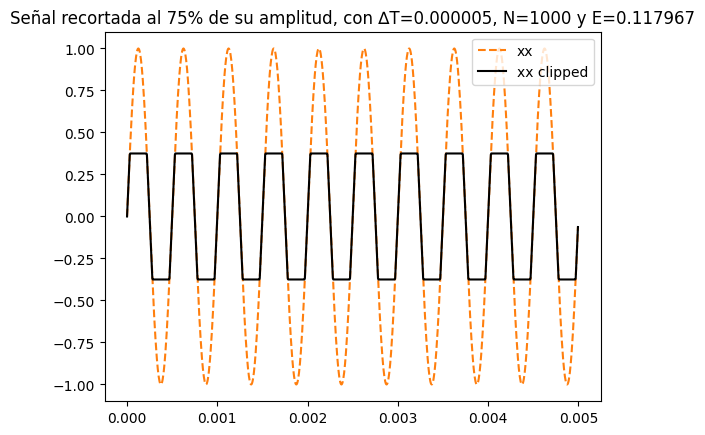

In [18]:
vmax= 1  #Volts 
dc = 0  #Volts
ff = 2000  #Hz
ph = 0 #Radianes
nn = 1000 # N
fs = 200000 #Hz
Ts=1/fs

def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt= np.linspace(0,(nn-1)*Ts,nn).flatten()
    xx = vmax* np.sin(2 * np.pi * ff * tt + ph) + dc
    return xx, tt

xx, tt = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

E=vmax**2/2 #energía
threshold=E*0.75

xx_clipped = np.clip(xx, -threshold, threshold)
Ec=np.mean(xx_clipped**2)

plt.figure()
plt.title('Señal recortada al 75% de su amplitud, con ∆T={:f}, N=1000 y E={:f}'.format(Ts,Ec))
plt.plot(tt, xx, color='tab:orange',linestyle='--',label='xx')
plt.plot(tt, xx_clipped, color='black',label='xx clipped')
plt.legend ()

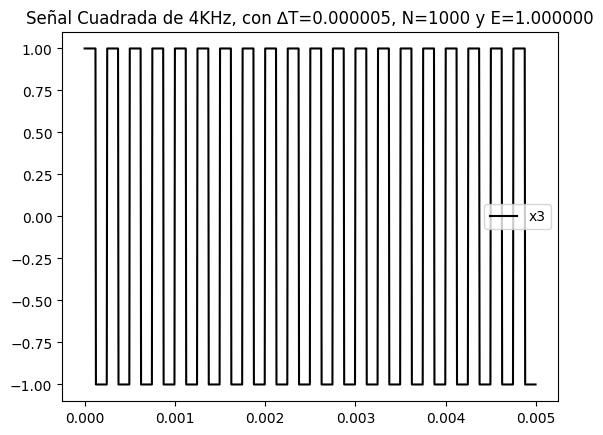

In [19]:
ff = 4000  #Hz

x3=signal.square(2*np.pi*tt*ff)
E=np.mean(x3**2)

plt.figure()
plt.title('Señal Cuadrada de 4KHz, con ∆T={:f}, N=1000 y E={:f}'.format(Ts,E))
plt.plot(tt, x3, color='black', label='x3')
plt.legend()

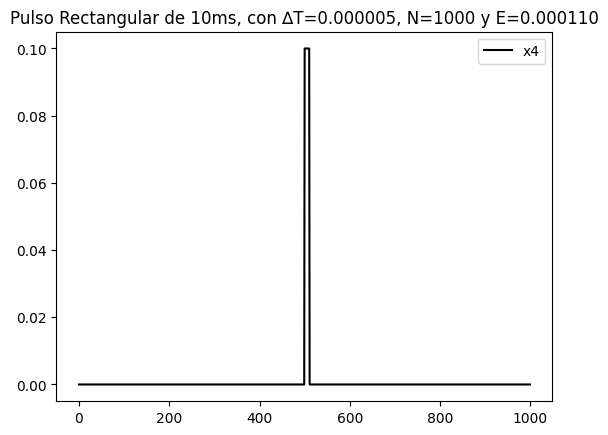

In [20]:
x4=np.zeros_like(tt)
x4[500:511]=0.1
E=np.mean(x4**2)

plt.figure()
plt.title('Pulso Rectangular de 10ms, con ∆T={:f}, N=1000 y E={:f}'.format(Ts,E))
plt.plot(x4,color='black', label='x4')
plt.legend()

### 2. Verificar ortogonalidad entre la primera señal y las demás:

In [22]:
o=np.inner(xx,xx)
print("Ortogonalidad entre xx y xx:", o)
o1=np.inner(xx,x1)
print("Ortogonalidad entre xx y x1:", o1)
o2=np.inner(xx,x2)
print("Ortogonalidad entre xx y x2:", o2)
oc=np.inner(xx,xx_clipped)
print("Ortogonalidad entre xx y x1x_clipped:", oc)
o3=np.inner(xx,x3)
print("Ortogonalidad entre xx y xx:", o3)
o4=np.inner(xx,x4)
print("Ortogonalidad entre xx y x4:", o4)

Ortogonalidad entre xx y xx: 500.00000000000006
Ortogonalidad entre xx y x1: -9.005574064246957e-13
Ortogonalidad entre xx y x2: -1.2202044930020861e-14
Ortogonalidad entre xx y x1x_clipped: 233.03848912131576
Ortogonalidad entre xx y xx: -1.999999999999982
Ortogonalidad entre xx y x4: 0.33324815148420783


### 3. Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás

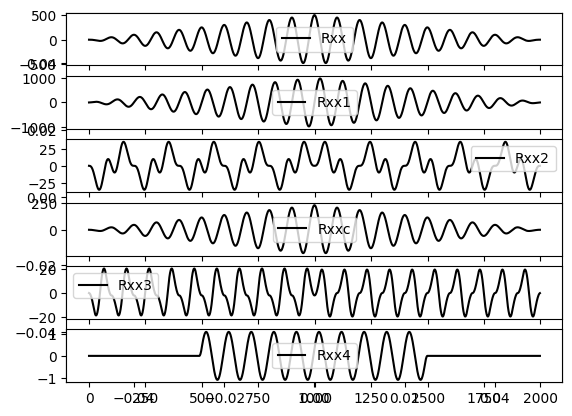

In [23]:
Rxx=signal.correlate(xx,xx)
Rxx1=signal.correlate(xx,x1)
Rxx2=signal.correlate(xx,x2)
Rxxc=signal.correlate(xx,xx_clipped)
Rxx3=signal.correlate(xx,x3)
Rxx4=signal.correlate(xx,x4)


plt.plot()
plt.subplot(611)
plt.plot(Rxx,color='black',label='Rxx')
plt.legend()


plt.subplot(612)
plt.plot(Rxx1,color='black',label='Rxx1')
plt.legend()


plt.subplot(613)
plt.plot(Rxx2,color='black',label='Rxx2')
plt.legend()


plt.subplot(614)
plt.plot(Rxxc,color='black',label='Rxxc')
plt.legend()


plt.subplot(615)
plt.plot(Rxx3,color='black',label='Rxx3')
plt.legend()


plt.subplot(616)
plt.plot(Rxx4,color='black',label='Rxx4')
plt.legend()

### 3.Dada la siguiente propiedad trigonométrica:

                                                    2⋅sin(α)⋅sin(β)=cos(α−β)−cos(α+β)

i.Demostrar la igualdad

ii. Mostrar que la igualdad se cumple con señales sinosoidales, considerando α=ω⋅t, el doble de β (Use la frecuencia que desee).

In [24]:
from IPython.display import IFrame
IFrame("./TS1_EJ3.jpg", width=1000, height=1200)

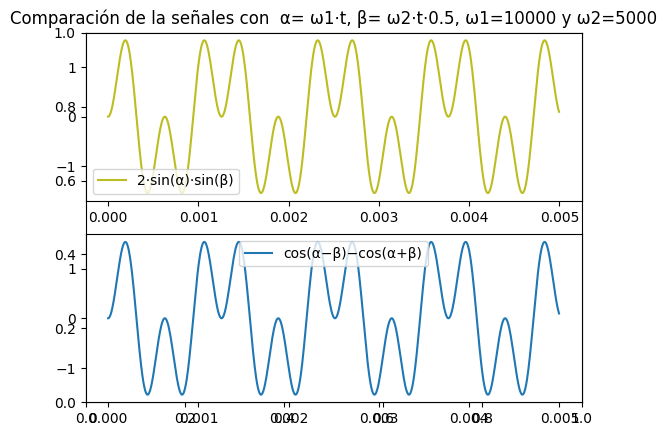

In [25]:
zz=2*np.sin(10000*tt)*np.sin(5000*tt)
yy=np.cos(10000*tt-5000*tt)-np.cos(10000*tt+5000*tt)

plt.figure()
plt.title('Comparación de la señales con  α= ω1⋅t, β= ω2⋅t⋅0.5, ω1=10000 y ω2=5000')
plt.subplot(211)
plt.plot(tt, zz, color='tab:olive',label='2⋅sin(α)⋅sin(β)')
plt.legend()
plt.subplot(212)
plt.plot(tt, yy, color='tab:blue', label='cos(α−β)−cos(α+β)')
plt.legend()

### Conclusiones